# Conceitos da Lei de Zipf

## Descrição

A Lei de Zipf, formulada pelo linguista George Zipf, descreve uma distribuição estatística empírica que é observada em diversos fenômenos naturais e foi originalmente descrita no livro Human Behaviour and the Principle of Least Efforts. Zipf propôs que, em muitos conjuntos de dados, a segunda posição mais frequente é aproximadamente a metade da frequência da palavra mais comum, a terceira posição é aproximadamente um terço, e assim por diante. Em outras palavras, a frequência de qualquer elemento é inversamente proporcional à sua posição no ranking.

## Encontrando a função de probabilidade

Adaptando a notação de "Zipf is everywhere" (LI, 2002) podemos tratar a frequência absoluta em uma distribuição zipfiana como ${ x_(k)=\frac{C}{k}}$, onde C é o tamanho do maior elemento e k a posição em que ele aparece. Seja N a quantidade de posições e T o total de todos os elementos juntos aparecem podemos montar uma relação em função de C utilizando a fórmula anterior, onde:
    ${ T = C/1 + C/2 + C/3 + ... + C/N = C \cdot \sum_{k = 1}^N \frac{1}{k} }$

Formalmente o somatório anterior é conhecido como função Harmônica e é comumente representada na notação:

### Função Harmônica
${ H_{N} = \sum _{k=1}^{N}{\frac {1}{k}} = 1 + \frac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{N} }$

A partir desses dados podemos calcular a frequência relativa dividindo a quantidade de vezes que um termo aparece pela quantidade de termos totais ${ \frac{x_(k)}{T} = \frac{C/k}{C \cdot H_{N}} }$, portanto a Função de Massa de probabilidade não depende do tamanho do primeiro elemento, mas apenas da quantidade de elementos e é expressa por ${ \frac{1/k}{H_{N, s}} }$

In [12]:
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

palavras = 5000
posicao = 3
print("Quantidade de palavras = {}, porcentagem do {}º termo = {:.2f}%".format(palavras, posicao, 100*porcZipf(palavras, posicao)))

Quantidade de palavras = 5000, porcentagem do 3º termo = 3.67%


## A função de Zipf de fato

Na distribuição de zipf propriamente dita utiliza-se a função harmônica generalizada e um parâmetro extra s, geralmente com s≈0.97, de modo que a com relação ao primeiro termo a frequência $\propto \frac{1}{k^{s}}$. Um fato curioso que para a maior parte dos casos a moda é 1.

### Função Harmônica Generalizada
#### ${ H_{N, s} = \sum _{k=1}^{N}{\frac {1}{k^s}} = 1 + \frac{1}{2^s} + \frac{1}{3^s} + \ldots + \frac{1}{N^s} }$

### Função de Probabilidade de Massa
#### ${P(K=k) = \frac{1/k^{s}}{H_{N, s}} }$

### Função Cumulativa de Probabilidade
#### ${P(K \leq k) = \frac{H_{k, s}}{H_{N, s}} }$


In [26]:
#Implementação da lei de zipf para python

def funcaoHarmonica(N, s=1):
    total = 0
    for k in range(1, N+1):
        total += 1/(k**s)
    return total

def funcaoDeMassa(N, k, s=1):
    return 1/(k**s * funcaoHarmonica(N, s))

def funcaoCumulativa(N, k, s=1):
    return funcaoHarmonica(k, s)/funcaoHarmonica(N, s)

## Versão em escala linear

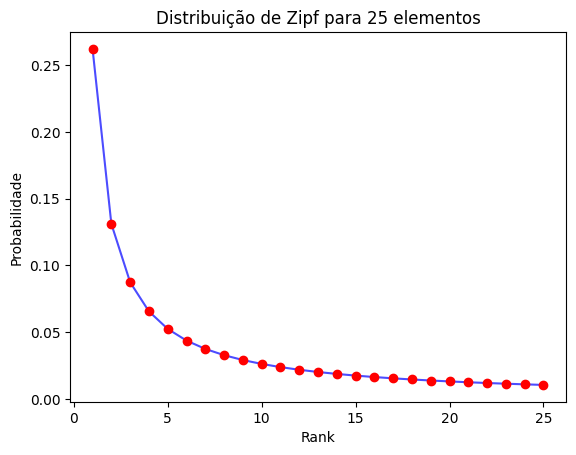

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicao_zipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoDistribuicaoZipf(n, y=1, a=0):
    # Recebe os valores
    ranks, probabilities = distribuicao_zipf(n, y, a)

    # Preenche as posições do grafico
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.plot(ranks, probabilities, 'ro')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.title(f'Distribuição de Zipf para {n} elementos')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')
    plt.show()

graficoDistribuicaoZipf(25)

## Versão em escala logarítimica

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicao_zipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoDistribuicaoZipf(n, y=1, a=0):
    # Recebe os valores
    ranks, probabilities = distribuicao_zipf(n, y, a)

    # Preenche as posições do grafico
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.plot(ranks, probabilities, 'ro')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf para {n} elementos')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')
    plt.show()

graficoDistribuicaoZipf(25)

## Variação de Zipf-Mendelbrot

Reza a lenda que Zipf odiava a matemática e gostava menos ainda de ter que usá-la no campo da linguística. Mandelbrot se preocupou em formalizar a distribuição e adicionou uma variável q tal que a frequência $\propto \frac{1}{(k+q)^{s}}$.

### Função de Massa de Probabilidade
${P(K=k) = \frac{1/(k+q)^{s}}{\sum _{k=1}^{N}{\frac {1}{(k+q)^s}}} }$

# Lei de Zipf aplicada em livros

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def receberDict(x):
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dicionario = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dicionario[chave] = valor
    return dicionario

# função de massa de probabilidade padrão para a distribuição de zipf
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicaoZipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoConjuntoZipf(n, y=1, a=0):
    ranks, probabilities = distribuicaoZipf(n, y, a)

    # Plota a distribuição de Zipf
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf {soma} palavras totais e {n} palavras unicas em {nomeLivro} fator y={y} e a={a}')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')

# Mude o caminho para fazer a distribuicao com outros livros
livro = "resultados/saida-casmurro.txt"

#recebe apenas o nome do livro sem o caminho
nomeLivro = livro.split("-")[1]

dicionario = receberDict(livro)
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

tamanho = len(listaValores)
soma = sum(listaValores)

# Fazendo os valores de x e y para o grafico
listaPosicoes = []
for i in range(tamanho):
    listaPosicoes.append(i+1)
    listaValores[i] /= soma


# Desenha gráfico de pontos vermelhos
plt.plot(listaPosicoes, listaValores, 'ro')

#Preenchendo parametro
n_palavras_diferentes = len(listaValores)

# Chama a função para plotar a distribuição de Zipf no mesmo gráfico
graficoConjuntoZipf(n_palavras_diferentes, 1, 0)

plt.show()

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def receberDict(x):
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dicionario = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dicionario[chave] = valor
    return dicionario

# função de massa de probabilidade padrão para a distribuição de zipf
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicaoZipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoConjuntoZipf(n, y=1, a=0):
    ranks, probabilities = distribuicaoZipf(n, y, a)

    # Plota a distribuição de Zipf
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf {soma} palavras totais e {n} palavras unicas em {nomeLivro} fator y={y} e a={a}')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')

# Mude o caminho para fazer a distribuicao com outros livros
livro = "resultados/saida-alice.txt"

#recebe apenas o nome do livro sem o caminho
nomeLivro = livro.split("-")[1]

dicionario = receberDict(livro)
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

tamanho = len(listaValores)
soma = sum(listaValores)

# Fazendo os valores de x e y para o grafico
listaPosicoes = []
for i in range(tamanho):
    listaPosicoes.append(i+1)
    listaValores[i] /= soma


# Desenha gráfico de pontos vermelhos
plt.plot(listaPosicoes, listaValores, 'ro')

#Preenchendo parametro
n_palavras_diferentes = len(listaValores)

# Chama a função para plotar a distribuição de Zipf no mesmo gráfico
plot_zipf_distribution(n_palavras_diferentes, 1, 0)

plt.show()

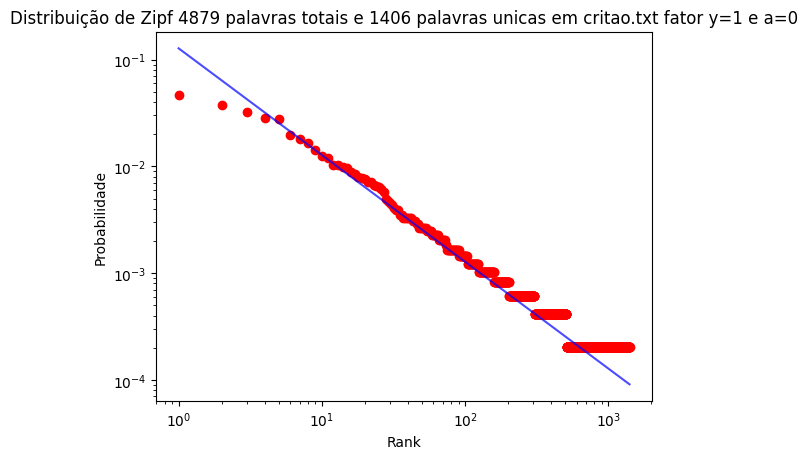

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def receberDict(x):
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dicionario = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dicionario[chave] = valor
    return dicionario

# função de massa de probabilidade padrão para a distribuição de zipf
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicaoZipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoConjuntoZipf(n, y=1, a=0):
    ranks, probabilities = distribuicaoZipf(n, y, a)

    # Plota a distribuição de Zipf
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf {soma} palavras totais e {n} palavras unicas em {nomeLivro} fator y={y} e a={a}')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')

# Mude o caminho para fazer a distribuicao com outros livros
livro = "resultados/saida-critao.txt"

#recebe apenas o nome do livro sem o caminho
nomeLivro = livro.split("-")[1]

dicionario = receberDict(livro)
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

tamanho = len(listaValores)
soma = sum(listaValores)

# Fazendo os valores de x e y para o grafico
listaPosicoes = []
for i in range(tamanho):
    listaPosicoes.append(i+1)
    listaValores[i] /= soma


# Desenha gráfico de pontos vermelhos
plt.plot(listaPosicoes, listaValores, 'ro')

#Preenchendo parametro
n_palavras_diferentes = len(listaValores)

# Chama a função para plotar a distribuição de Zipf no mesmo gráfico
plot_zipf_distribution(n_palavras_diferentes, 1, 0)

plt.show()

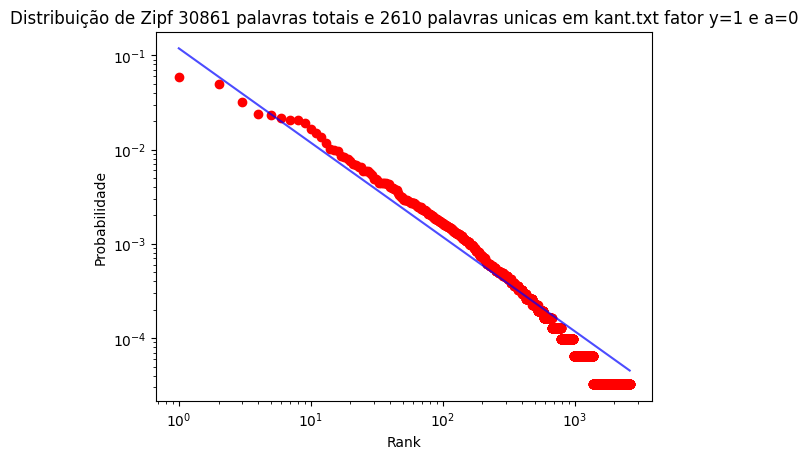

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def receberDict(x):
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dicionario = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dicionario[chave] = valor
    return dicionario

# função de massa de probabilidade padrão para a distribuição de zipf
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicaoZipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoConjuntoZipf(n, y=1, a=0):
    ranks, probabilities = distribuicaoZipf(n, y, a)

    # Plota a distribuição de Zipf
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf {soma} palavras totais e {n} palavras unicas em {nomeLivro} fator y={y} e a={a}')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')

# Mude o caminho para fazer a distribuicao com outros livros
livro = "resultados/saida-kant.txt"

#recebe apenas o nome do livro sem o caminho
nomeLivro = livro.split("-")[1]

dicionario = receberDict(livro)
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

tamanho = len(listaValores)
soma = sum(listaValores)

# Fazendo os valores de x e y para o grafico
listaPosicoes = []
for i in range(tamanho):
    listaPosicoes.append(i+1)
    listaValores[i] /= soma


# Desenha gráfico de pontos vermelhos
plt.plot(listaPosicoes, listaValores, 'ro')

#Preenchendo parametro
n_palavras_diferentes = len(listaValores)

# Chama a função para plotar a distribuição de Zipf no mesmo gráfico
plot_zipf_distribution(n_palavras_diferentes, 1, 0)

plt.show()

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def receberDict(x):
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dicionario = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dicionario[chave] = valor
    return dicionario

# função de massa de probabilidade padrão para a distribuição de zipf
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

#Os parametros y e a não são necessário e servem para transformar na variacao Zipf-Mandelbrot
def distribuicaoZipf(n, y=1, a=0):
    # Gera os ranks e probabilidades de acordo com a lei de Zipf
    ranks = np.arange(1, n + 1)
    probabilities = 1 / ((ranks+a)** y)

    # Normaliza as probabilidades para que somem 1
    probabilities /= np.sum(probabilities)
    return ranks, probabilities

def graficoConjuntoZipf(n, y=1, a=0):
    ranks, probabilities = distribuicaoZipf(n, y, a)

    # Plota a distribuição de Zipf
    plt.plot(ranks, probabilities, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Distribuição de Zipf {soma} palavras totais e {n} palavras unicas em {nomeLivro} fator y={y} e a={a}')
    plt.xlabel('Rank')
    plt.ylabel('Probabilidade')

# Mude o caminho para fazer a distribuicao com outros livros
livro = "resultados/saida-sawyer.txt"

#recebe apenas o nome do livro sem o caminho
nomeLivro = livro.split("-")[1]

dicionario = receberDict(livro)
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

tamanho = len(listaValores)
soma = sum(listaValores)

# Fazendo os valores de x e y para o grafico
listaPosicoes = []
for i in range(tamanho):
    listaPosicoes.append(i+1)
    listaValores[i] /= soma


# Desenha gráfico de pontos vermelhos
plt.plot(listaPosicoes, listaValores, 'ro')

#Preenchendo parametro
n_palavras_diferentes = len(listaValores)

# Chama a função para plotar a distribuição de Zipf no mesmo gráfico
plot_zipf_distribution(n_palavras_diferentes, 1, 0)

plt.show()

# Lei de Zipf aplicada à cidades

## Quantidade populacional das cidades
Se analisarmos a populaçao das cidades de qualquer pais do mundo, a 2º mais populosa terá a metade do tamanho da 1ª, a 3ª terá 1/3 e assim por diante, sendo observável a lei de Zipf.

## Princípio de Pareto
O italiano Pareto percebeu uma relação de 80/20 entre diversas situações econômicas e sociais, podendo explicar a forma de crescimento dessas cidades.
<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/pareto.jpeg" width="500px">
</div>

## Por que as cidades crescem dessa maneira?
O matemático Steven Strogatz propôs uma analogia entre o crescimento exponencial das grandes cidades e o desenvolvimento do metabolismo de células de mamíferos, podendo explicar porque as grandes cidades nao crescem de forma totalmente aleatória, mas obedecendo a lei de Zipf.

## Percepção da lei de Zipf em cidades menores
O economista Xavier Gabaix afirmou sobre a dificuldade da percepção da lei em cidades menores que 100mil habitantes, sendo então necessário uma análise utilizando a escala logarítmica para maior percepção.
<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/cities.jpeg" width="650px">
</div>

# Lei de Zipf em modelos totalmente aleatórios

## Sobre
Vamos testar a soberania da Lei de Zipf no que tange o conceito de aleatoriedade total, que tipo de padrões podem ser encontrados se o objeto de estudo é puramente aleatório?

<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/Babel1.jpeg" width="500px">
</div>

## A Biblioteca de Babel
A Biblioteca de Babel é um conto de Jorge Luis Borges, inserido no livro Ficciones, de 1944. Este conto, essencialmente metafísico, fala de uma realidade em que o mundo é constituído por uma biblioteca infindável, abrigando uma infinidade de livros.

### Site
No [site da biblioteca](https://libraryofbabel.info) feito inspirado pelo conto já existe tudo que já foi, e será escrito que possa ser resumido em 3200 caracteres, incluindo todas as letras do alfabeto, espaços, vírgulas e pontos finais.

<div style="margin-top: 20px; text-align: center; margin-bottom: 40px">
    <img src="imagens/siteBabel.jpeg" width="900px">
    <br>
</div>

### O processo por trás do "acaso"
Óbvio que nem todo o hardware que temos atualmente combinado suportaria a estrutura de dados da Biblioteca, então cada página recebe um número de página sequencial na base 10 e o texto dessa página está no processo de pegar esse número e passar por um algoritmo assim como vemos no geramento de seeds de alguns jogos, como se fosse uma função hash que gera um valor único na base 29 (todas as letras, espaços, vírgulas e pontos), porém, diferente dessa função hash, existe uma função de volta pro estado original e é através disso que existe como buscar texto na página.

<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/AlgoritmoVsauce.jpeg" width="500px">
</div>

<!-- <p style="text-align: center;"> Fonte: Messages for The Future, Vsauce <p> -->

Ao todo, 10 elevado a 5000 páginas são ofertadas pela Biblioteca de Babel, só existem 10 elevado a 80 átomos no universo, você caso tivesse de ler tudo isso seria capaz de ver a morte térmica do universo, em comparação, existe 10 elevado a 80 átomos no universo.

## Lei de Zipf e o Teorema do Macaco Infinito

O "Teorema do Macaco Infinito" afirma que um macaco digitando aleatoriamente em um teclado por um intervalo de tempo infinito irá quase certamente criar um texto qualquer escolhido, como por exemplo a obra completa de William Shakespeare.

<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/Macaquinhos.jpeg" width="450px">
</div>

### Aplicando Zipf
Ignorando a possibilidade de tal formar palavras que não existem na língua portuguesa, temos a regra geral `(26/27)^x * 1/27`. Para formar uma palavra de uma letra o macaco teria uma chance de `26/27 * 1/27 = 0,035` ou 3% de chance, já para palavras de duas letras temos `26/27 * 26/27 * 1/27 = 0,034` ou 3% de chance, enquanto pra três letras temos, já para de 12 letras temos aproximadamente 0,02 ou 2% de chance, Assim, aplicando a lei de Zipf, temos que mesmo o macaco escrevendo palavras pelo mais puro acaso, essa aleatoriedade por mais que pareça perfeita, a distribuição segue as normas da lei de Zipf, onde as palavras com até 10 letras, por mais que tenham mais chance de ocorrer, ocupam somente 30% das palavras digitadas pelo macaco, fazendo com que 70% das palavras digitadas por tal tenham de mais de 11 letras, e quanto mais letras, menor a probabilidade do macaco tê-la escrito.

<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/distribuicaoAleatoria.jpg" width="550px">
</div>

### George A. Miller
Isso vem de uma pesquisa de George Miller, que é considerado por muitos o pai da ciência cognitiva moderna além de um entusiasta nos estudos de linguística, provou que essas "palavras" escritas pelo macaco do teorema estão sim, coerentes com a lei de Zipf.

<div style="margin-top: 20px; text-align: center;">
    <img src="imagens/GeorgeMiller.jpeg" width="500px">
</div>


# Referências

LI, Wentian. Zipf's Law everywhere. **Glottometrics**, v. 5, n. 2002, p. 14-21, 2002. Disponível em: https://www.researchgate.net/publication/253290454_Zipf%27s_Law_Everywhere.

NEWTIZ, Annalee. A mysterious law that predicts the size of the world's biggest cities. **Gizmodo**, 2013. Disponível em: https://gizmodo.com/the-mysterious-law-that-governs-the-size-of-your-city-1479244159.

STEVENS, Michael. **The Zipf Mystery**. Youtube, 2015. Disponível em: https://www.youtube.com/watch?v=fCn8zs912OEs.

STEVENS, Michael. **Messages For The Future**. Youtube, 2015. Disponível em: https://www.youtube.com/watch?v=GDrBIKOR01c.

YANG, Charles. Who's afraid of George Kingsley Zipf? Or: Do children and chimps have language?. **Significance**, v. 10, n. 6, p. 29-34, 2013. Disponível em: https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2013.00708.x.